<a href="https://colab.research.google.com/github/santhosh1728/Regressions/blob/main/online_froud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("froud_detections.csv")

In [8]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,156646.32,491301.04,0.0,0.0


In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [10]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [13]:
df['step'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
42266,False,False,False,False,False,False,False,False,False,False,False
42267,False,False,False,False,False,False,False,False,False,False,False
42268,False,False,False,False,False,False,False,False,False,False,False
42269,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [16]:
df.shape

(42271, 11)

In [17]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [18]:
type = df['type'].value_counts()

In [19]:
type

PAYMENT     19382
CASH_OUT    10689
CASH_IN      7632
TRANSFER     3974
DEBIT         594
Name: type, dtype: int64

In [20]:
transactions = type.index
transactions

Index(['PAYMENT', 'CASH_OUT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

In [21]:
quantity = type.values
quantity

array([19382, 10689,  7632,  3974,   594])

In [22]:
import plotly.express as px

In [23]:
px.pie(df,values = quantity, names = transactions,hole =0.4,title = "Distribution of transaction type")

In [24]:
 df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [25]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [27]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,156646.32,491301.04,0.0,0.0


In [28]:
df = df.dropna()

In [29]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42265,9,PAYMENT,1011.16,C802172585,317.0,0.00,M1111680498,0.00,0.00,0.0,0.0
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0


In [30]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [31]:

df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[1,4,2,5,3],inplace = True)


<ipython-input-31-08df1e1a65b4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42265,9,1,1011.16,C802172585,317.0,0.00,M1111680498,0.00,0.00,0.0,0.0
42266,9,2,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,2,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,2,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0


In [33]:
df['type'].unique()

array([1, 4, 2, 5, 3])

In [34]:
type

PAYMENT     19382
CASH_OUT    10689
CASH_IN      7632
TRANSFER     3974
DEBIT         594
Name: type, dtype: int64

In [35]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42265,9,1,1011.16,C802172585,317.0,0.00,M1111680498,0.00,0.00,0.0,0.0
42266,9,2,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,2,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,2,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42270 entries, 0 to 42269
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42270 non-null  int64  
 1   type            42270 non-null  int64  
 2   amount          42270 non-null  float64
 3   nameOrig        42270 non-null  object 
 4   oldbalanceOrg   42270 non-null  float64
 5   newbalanceOrig  42270 non-null  float64
 6   nameDest        42270 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 3.9+ MB


In [37]:
df['isFraud'] = df['isFraud'].map({0:'No fraud',1:'fraud'})

<ipython-input-37-60848f9028ae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,No fraud,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,No fraud,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,fraud,0.0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,fraud,0.0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,No fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42265,9,1,1011.16,C802172585,317.0,0.00,M1111680498,0.00,0.00,No fraud,0.0
42266,9,2,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,No fraud,0.0
42267,9,2,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,No fraud,0.0
42268,9,2,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,No fraud,0.0


In [39]:
x = df[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [40]:
# y = df.iloc[:,-2]
y =df['isFraud']

In [41]:
y

0        No fraud
1        No fraud
2           fraud
3           fraud
4        No fraud
           ...   
42265    No fraud
42266    No fraud
42267    No fraud
42268    No fraud
42269    No fraud
Name: isFraud, Length: 42270, dtype: object

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model = DecisionTreeClassifier()

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 42)

In [45]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [46]:
model.score(xtest,ytest)

0.9971611071682044

In [47]:
model.predict([[1,9839.64,170136.00,160296.36]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['No fraud'], dtype=object)

In [48]:
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,1,9839.64,170136.0,160296.36
1,1,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,2,181.00,181.0,0.00
4,1,11668.14,41554.0,29885.86
...,...,...,...,...
42265,1,1011.16,317.0,0.00
42266,2,195364.06,0.0,0.00
42267,2,546075.62,0.0,0.00
42268,2,111003.87,0.0,0.00


In [49]:
models = []
results = []
names = []

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [51]:
models.append(('LN',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('CART',DecisionTreeClassifier()))

In [52]:
models

[('LN', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('CART', DecisionTreeClassifier())]

In [53]:
from sklearn import model_selection

In [54]:
for name,model in models:
  kfold = model_selection.KFold(n_splits=10,random_state=42,shuffle=True)
  cv_result = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
  names.append(name)
  meg = '%s: %f'%(name,cv_result.mean())
  print(meg)

LN: 0.997894
KNN: 0.998013
NB: 0.930920
SVM: 0.997776
CART: 0.998131


In [55]:
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,1,9839.64,170136.0,160296.36
1,1,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,2,181.00,181.0,0.00
4,1,11668.14,41554.0,29885.86
...,...,...,...,...
42265,1,1011.16,317.0,0.00
42266,2,195364.06,0.0,0.00
42267,2,546075.62,0.0,0.00
42268,2,111003.87,0.0,0.00


finding the absolute mean error

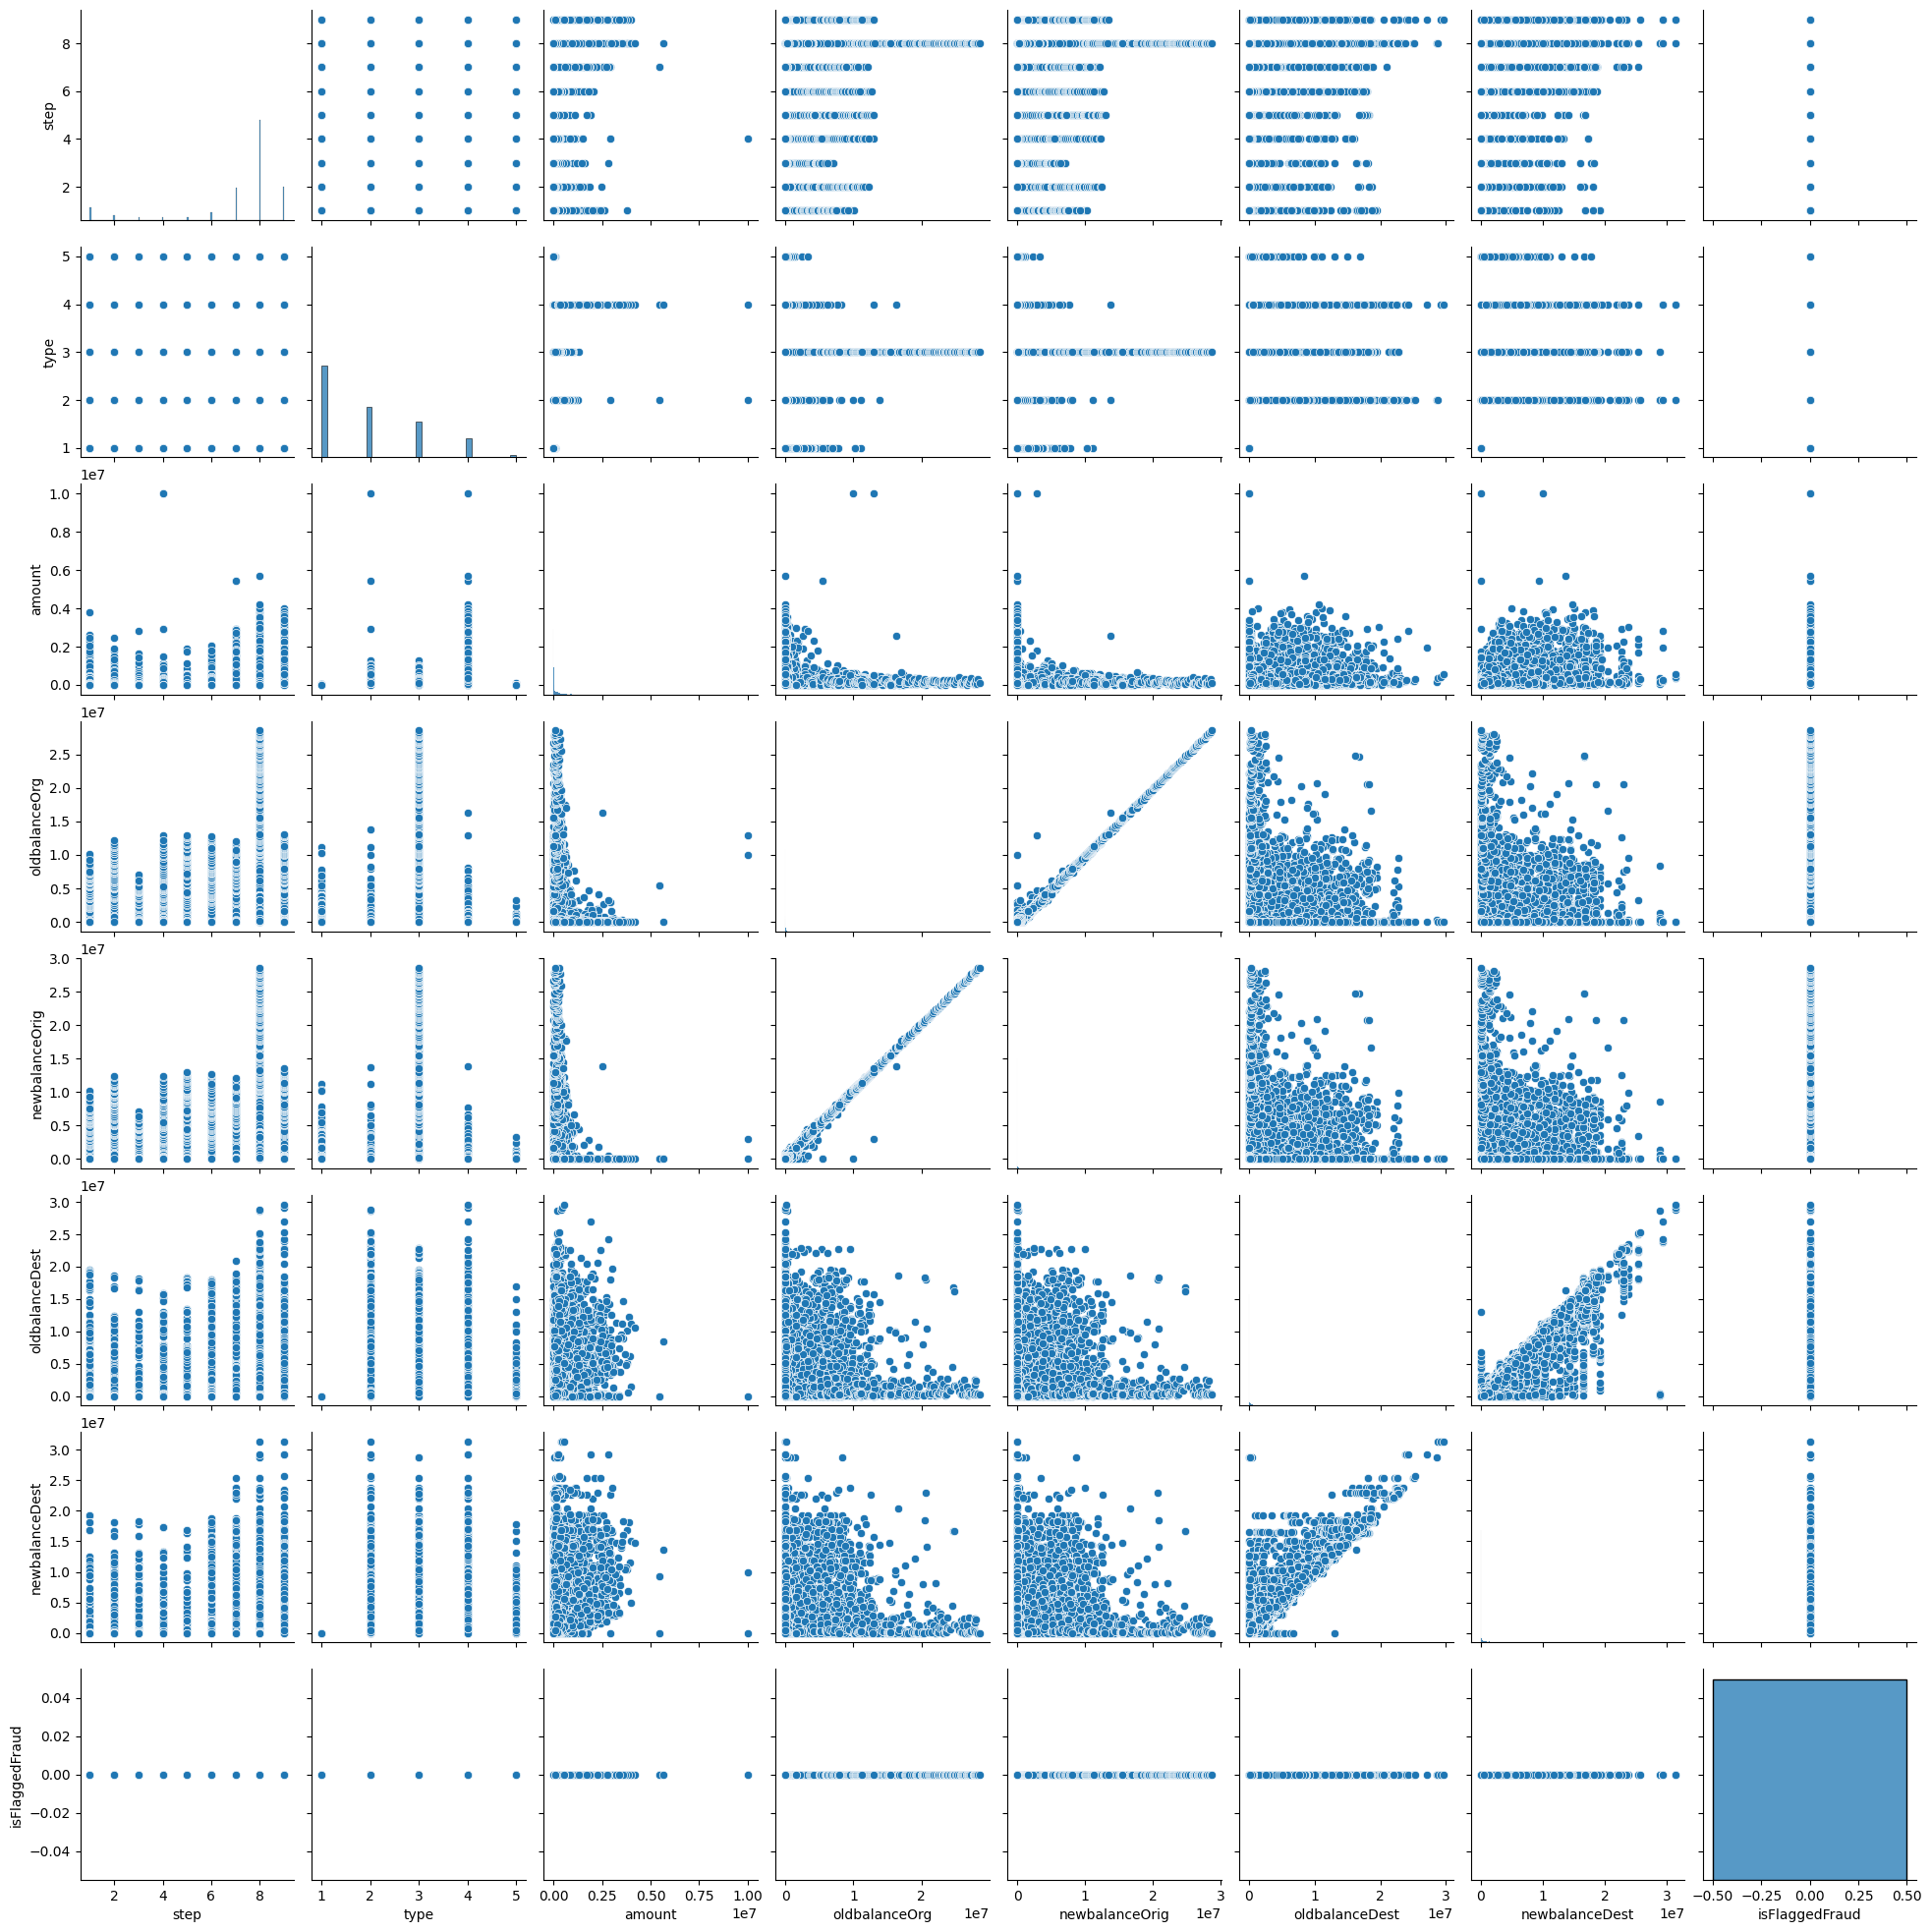

In [56]:
sns.pairplot(df)

In [57]:
df['isFraud'] = df['isFraud'].map({'No fraud':0,'fraud':1})

<ipython-input-57-6e579f29d157>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
# from sklearn.model_selection import train_test_split
# xtarin,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state = 1)
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()